<a href="https://colab.research.google.com/github/NacerSebtiMS/P300-Data-Analysis/blob/main/P300_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data-Analysis

+ The analysis consists in identifying the signals measured the presence of a wave called P300
+ Studying the automation of this classification and implementing several pattern recognition techniques to evaluate them.

## The dataset

+ The first category includes signals that are pre-labeled as P300 or P300-free, and should be used to design and validate the recognition system.
+ The second category includes signals for which the category to which they belong is not known a priori (unknown). The recognition system will automatically classify them into the CP300 or CP300-free class.

### Study and analysis of the distributions (probability distributions)
+ Examine the shape of the probability laws (dispersion and distribution of points);
+ Examine the eigenvalues of the covariance matrices;
+ Study the relevance of decorrelation of coordinates;
+ In order to reduce computations and the duration of treatments, study the relevance of a dimension reduction by decorrelation;
+ Examine again the shape of the laws of probability after decorrelation.
+ Study the visual form of the boundary equations between CP300 and Non CP300 classes;
+ From previous work, deduce the advantages and disadvantages of direct estimation of probability densities by joint probabilities or by independent likelihood estimation for each of the dimensions.

### Implementation of three Bayesian classification algorithms

All three algorithms must take into account the cost associated with poor detection of the P300. The cost of not detecting the presence of a P300 ("false negative") is 3, while the cost of not detecting the absence of a P300 ("false positive") is 1.

+ Implement a classification algorithm that uses the assumption that the laws are Gaussian;
+ Implement another algorithm that allows a classification without using the mathematical expression of the boundaries and without assuming the Gaussian character but using the risk as defined by Bayes.
+ Finally for the third algorithm use the mathematical expression of the boundaries assuming that the probability densities are Gaussian.

#### Evaluation

+ Separate the data into two sets :
    + learning set;
    + Testing set.
+ With these sets, evaluate the average classification rate of the 3 systems, compare the results and comment

### K-NN & K-means

Test now and experiment with non-parametric approaches. Document the classification of the same signals as before using two methods :
+ Classification by the k-nearest neighbors (k-NN);
+ Classification according to the k-NN algorithm but first using vector quantization (k-means) in order to reduce the size of the data used for the classification.

Criticize and compare the two methods of using k-NN.

### Comparison

Based on the average misclassification rate of the different techniques you used, comment, document and discuss the results by comparing the techniques.

### Image recognition

Brain response is highly dependent on context and mood. It would therefore be important to match the EEG measurement with images from a camera to determine the person's mood (tense, angry, relaxed, etc.). We choose to classify the environments in which the subject finds himself or herself by assuming that the environment has an impact on mood. Evaluate the possibility of classifying the nature of images into three categories (beach, forest and town/road).

For simplicity, only color information be used. You will design an image recognition system that will allow to classify the nature of images in the 3 categories (beach, forest and city) with only the color information. The system must be able to operate for different codings of the color characteristics of the images.


## Loading data and library imports

Clonning the repository gives access to the data

In [8]:
!git clone https://github.com/NacerSebtiMS/P300-Data-Analysis.git

fatal: destination path 'P300-Data-Analysis' already exists and is not an empty directory.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

All datasets are loaded and the columns are labeled with X1, X2, X3 and X4.

In [10]:
P300_PATH = "/content/P300-Data-Analysis/data/P300/"

COLUMN_NAMES = ['X1','X2','X3','X4']

# Ref P300 data
path_ref_P300 = P300_PATH + "ref_P300"
ref_P300 = pd.read_csv(path_ref_P300, delim_whitespace=True)
ref_P300.columns = COLUMN_NAMES
# Ref NP300 data
path_ref_NP300 = P300_PATH + "ref_NP300"
ref_NP300 = pd.read_csv(path_ref_NP300, delim_whitespace=True)
ref_NP300.columns = COLUMN_NAMES

# Test P300 data
path_test_P300 = P300_PATH + "test_P300"
test_P300 = pd.read_csv(path_test_P300, delim_whitespace=True)
test_P300.columns = COLUMN_NAMES
# Test NP300 data
path_test_NP300 = P300_PATH + "test_NP300"
test_NP300 = pd.read_csv(path_test_NP300, delim_whitespace=True)
test_NP300.columns = COLUMN_NAMES

# prediction data
path_unknown = P300_PATH + "Inconnus"
unknown = pd.read_csv(path_unknown, delim_whitespace=True)
unknown.columns = COLUMN_NAMES

## Study and analysis of the distributions (probability distributions)

### Examine the shape of the probability laws (dispersion and distribution of points)


In [11]:
n = max(len(ref_P300), len(ref_NP300))
x_P300 = np.linspace(1, n, len(ref_P300))
x_NP300 = np.linspace(1, n, len(ref_NP300))

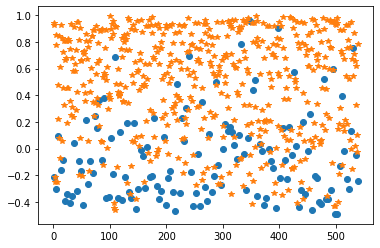

In [12]:
plt.plot(x_P300,ref_P300['X1'],'o')
plt.plot(x_NP300, ref_NP300['X1'],'*')
plt.show()

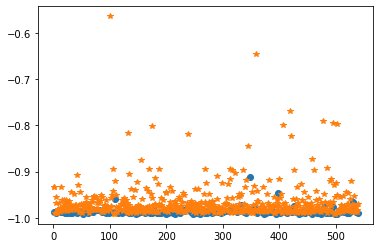

In [13]:
plt.plot(x_P300,ref_P300['X2'],'o')
plt.plot(x_NP300, ref_NP300['X2'],'*')
plt.show()

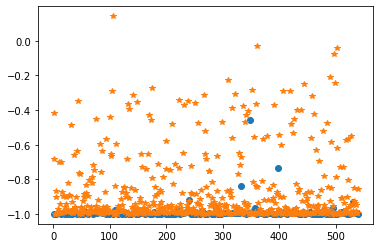

In [14]:
plt.plot(x_P300,ref_P300['X3'],'o')
plt.plot(x_NP300, ref_NP300['X3'],'*')
plt.show()

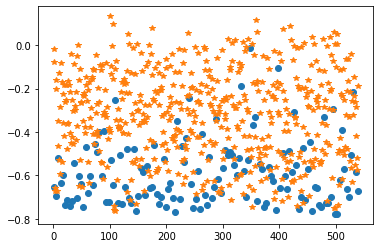

In [15]:
plt.plot(x_P300,ref_P300['X4'],'o')
plt.plot(x_NP300, ref_NP300['X4'],'*')
plt.show()

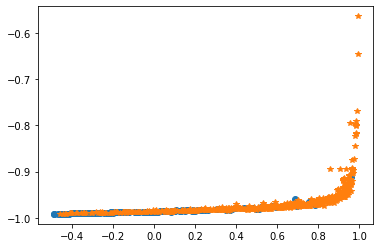

In [16]:
plt.plot(ref_P300['X1'],ref_P300['X2'],'o')
plt.plot(ref_NP300['X1'],ref_NP300['X2'],'*')

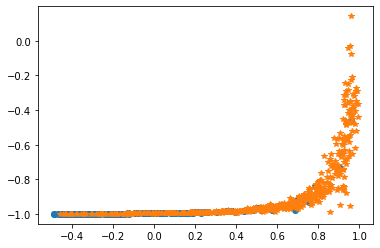

In [17]:
plt.plot(ref_P300['X1'],ref_P300['X3'],'o')
plt.plot(ref_NP300['X1'],ref_NP300['X3'],'*')

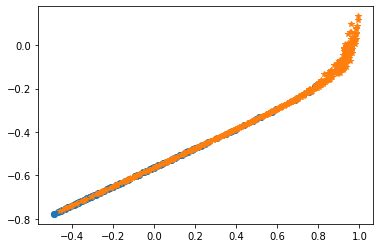

In [18]:
plt.plot(ref_P300['X1'],ref_P300['X4'],'o')
plt.plot(ref_NP300['X1'],ref_NP300['X4'],'*')

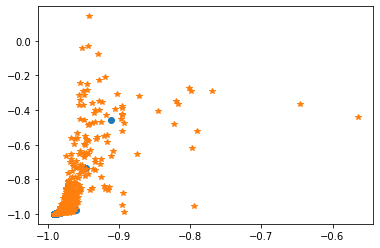

In [19]:
plt.plot(ref_P300['X2'],ref_P300['X3'],'o')
plt.plot(ref_NP300['X2'],ref_NP300['X3'],'*')

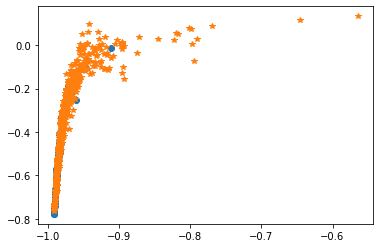

In [20]:
plt.plot(ref_P300['X2'],ref_P300['X4'],'o')
plt.plot(ref_NP300['X2'],ref_NP300['X4'],'*')

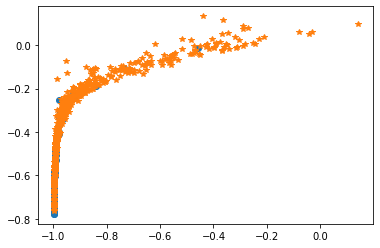

In [21]:
plt.plot(ref_P300['X3'],ref_P300['X4'],'o')
plt.plot(ref_NP300['X3'],ref_NP300['X4'],'*')

### Examine the eigenvalues of the covariance matrices

Estimation of the average

In [22]:
# Ref P300 avg
[avg_X1_P300,avg_X2_P300,avg_X3_P300,avg_X4_P300] = ref_P300.mean()
print(ref_P300.mean())

X1   -0.064840
X2   -0.985659
X3   -0.986271
X4   -0.588270
dtype: float64


In [23]:
# Ref NP300 avg
[avg_X1_NP300,avg_X2_NP300,avg_X3_NP300,avg_X4_NP300] = ref_NP300.mean()
print(ref_NP300.mean())

X1    0.490579
X2   -0.965857
X3   -0.871183
X4   -0.317981
dtype: float64


Covariance matrices

In [24]:
# Coding the df.cov() method
def avg(column):
  return column.sum()/len(column)

def covariance(column1, column2):
  if(len(column1) != len(column2)):
    raise Exception("Column1 and Column2 don't have the same len")
  else :
    term1 = column1 - avg(column1)
    term2 = column2 - avg(column1)
    mult = term1 * term2.transpose()
    s = mult.sum()
    return s / (len(column1)-1)

def covariance_matrice(df):
  col = df.columns
  cov_mat = pd.DataFrame(np.zeros([len(df.columns),len(df.columns)]), index=col,columns=col)
  for i in range(len(df.columns)):
    for j in range(i,len(col)):
      c = covariance(df[col[i]],df[col[j]])
      cov_mat[col[i]][col[j]] = c
      cov_mat[col[j]][col[i]] = c
  return cov_mat

In [25]:
cov_ref_P300 = covariance_matrice(ref_P300)
cov_ref_NP300 = covariance_matrice(ref_NP300)

In [26]:
cov_ref_P300

,X1,X2,X3,X4
X1,0.105842,0.002198,0.009409,0.048398
X2,0.002198,0.000078,0.000434,0.001065
X3,0.009409,0.000434,0.002894,0.004806
X4,0.048398,0.001065,0.004806,0.022255


In [27]:
cov_ref_NP300

,X1,X2,X3,X4
X1,0.148139,0.007844,0.049520,0.076835
X2,0.007844,0.001417,0.004790,0.004874
X3,0.049520,0.004790,0.039518,0.031121
X4,0.076835,0.004874,0.031121,0.041246


In [28]:
eigvals_ref_P300, eigvect_ref_P300 = np.linalg.eig(cov_ref_P300)
print(eigvals_ref_P300)

[1.28926303e-01 2.13784493e-03 8.24314117e-18 4.81563881e-06]


In [29]:
eigvals_ref_NP300, eigvect_ref_NP300 = np.linalg.eig(cov_ref_NP300)
print(eigvals_ref_NP300)

[2.08933838e-01 2.05253469e-02 1.11599043e-17 8.60777219e-04]


### Study the relevance of decorrelation of coordinates

### Study the relevance of a dimension reduction by decorrelation

### Examine again the shape of the laws of probability after decorrelation

### Study the visual form of the boundary equations between P300 and NP300 classes

### Deduce the advantages and disadvantages of direct estimation of probability densities by joint probabilities or by independent likelihood estimation for each of the dimensions

## Implementation of three Bayesian classification algorithms

### Classification algorithm that uses the assumption that the laws are Gaussian

### Bayes risk classification algorithm

### Mathematical expression of the boundaries assuming that the probability densities are Gaussian

### Evaluation

#### Separate data

#### Rvaluation of the average classification rate of the 3 systems, compare the results and comment

## K-NN & K-means

Defining a distance

In [30]:
def euclidean_distance(p1,p2):
  try:
    s = 0
    for i in range(len(p1)):
      s += abs(p1[i]-p2[i])
    return s
  except:
    return abs(p1-p2)

dist = lambda p1, p2 : euclidean_distance(p1,p2)

In [123]:
def replace_min(t,L):
  for i in range(len(L)):
    if L[i][0]>t[0] or L[i][0] == -1:
      L[i] = t
      return L
  return L

def count(L,e):
  s = 0
  for t in L :
    if t[1] == e:
      s+=1
  return s

def build_list(row,cols):
  L = []
  for col in cols:
    L += [row[col]]
  return L

def k_nn(k,x_train,y_train,x_pred,dst):
  y_col = y_train.columns[0]
  classes = y_train[y_col].unique()
  cols = x_train.columns
  y_pred = pd.DataFrame(np.empty(len(x_pred), dtype=object),columns=y_train.columns)
  i = 0
  for pred_index, pred_row in x_pred.iterrows():
    min = [(-1,0)]*k
    for train_index,train_row in x_train.iterrows():
      #d = dst( [ train_row['X1'],train_row['X2'],train_row['X3'],train_row['X4'] ], [ pred_row['X1'],pred_row['X2'],pred_row['X3'],pred_row['X4'] ] )
      d = dst( build_list(pred_row,cols), build_list(train_row,cols) )
      min = replace_min( (d,y_train[y_col][train_index]), min)
    max = 0
    for c in classes:
      if count(min,c) > max:
        y_pred[y_col][i] = c
    i+=1
  return y_pred

In [124]:
x_train_knn_P300 = ref_P300
y_train_knn_P300 = pd.DataFrame(np.empty(len(x_train_knn_P300)),columns=["class"])
y_train_knn_P300['class'] = 'P300'

x_train_knn_NP300 = ref_NP300
y_train_knn_NP300 = pd.DataFrame(np.empty(len(x_train_knn_NP300)),columns=["class"], index=pd.RangeIndex(len(y_train_knn_P300),len(y_train_knn_P300)+len(x_train_knn_NP300),1))
y_train_knn_NP300['class'] = 'NP300'

x_train = pd.concat([x_train_knn_P300,x_train_knn_NP300])
y_train = pd.concat([y_train_knn_P300,y_train_knn_NP300])

x_pred_knn = pd.concat([test_P300,test_NP300], keys=['P300','NP300'])

In [125]:
def check_knn(x_pred,y_pred):
  i=0
  s=0
  for c,index in x_pred.index:
    if y_pred['class'][i] == c:
      s+=1
    i+=1
  return s

print('k\t acc')
for k in range(1,4,2):
  y_pred_knn = k_nn(k,x_train,y_train,x_pred_knn,dist)
  print(k,'\t',check_knn(x_pred_knn,y_pred_knn) / len(x_pred_knn) * 100,'%')

k	 acc
1 	 58.620689655172406 %
3 	 51.724137931034484 %


#### Classification by the k-nearest neighbors (k-NN)

#### Classification according to the k-NN algorithm but first using vector quantization (k-means) in order to reduce the size of the data used for the classification

#### Comparaison between k-NN and k-NN using k-means

## Comparison

## Image recognition